https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('autos.csv', delimiter = ";")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,12.0,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,12.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,12.0,70,1,ford torino


In [3]:
#izbacujemo NA vrijednosti (u podacima su to ?)

data = data.replace('?', np.nan)
print(data.shape)
data = data.dropna()
print(data.shape)

(398, 9)
(392, 9)


# Napravimo prediktivni model koji predviđa potrošnju goriva 

In [4]:
#izbacujemo stupac model year, origin i car name
col = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
data = data[col]

In [5]:
data['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [6]:
data_features = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
data_target = data[['mpg']].astype(float)
data_target.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [7]:
data_target['mpg'] = pd.to_numeric(data_target['mpg'])

pd.options.mode.chained_assignment = None
data_features['displacement'] = pd.to_numeric(data_features['displacement'])
data_features['horsepower'] = pd.to_numeric(data_features['horsepower'])
data_features['weight'] = pd.to_numeric(data_features['weight'])
data_features['acceleration'] = pd.to_numeric(data_features['acceleration'])
data['mpg'].describe()
data_features = pd.get_dummies(data_features, columns = ['cylinders'])
data_features.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,307.0,130,3504,12.0,0,0,0,0,1
1,350.0,165,3693,12.0,0,0,0,0,1
2,318.0,150,3436,12.0,0,0,0,0,1
3,304.0,150,3433,12.0,0,0,0,0,1
4,302.0,140,3449,12.0,0,0,0,0,1


In [8]:
from sklearn import preprocessing 

data_features[['displacement','horsepower', 'weight', 'acceleration']] = preprocessing.scale(data_features[['displacement','horsepower', 'weight', 'acceleration']])
data_features.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,1.077290,0.664133,0.620540,-1.318403,0,0,0,0,1
1,1.488732,1.574594,0.843334,-1.318403,0,0,0,0,1
2,1.182542,1.184397,0.540382,-1.318403,0,0,0,0,1
3,1.048584,1.184397,0.536845,-1.318403,0,0,0,0,1
4,1.029447,0.924265,0.555706,-1.318403,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.2, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((313, 9), (313, 1), (79, 9), (79, 1))

# Torch

In [10]:
import torch

x_train_T = torch.tensor(x_train.values, dtype=torch.float)
x_test_T = torch.tensor(x_test.values, dtype=torch.float)
y_train_T = torch.tensor(y_train.values, dtype=torch.float)
y_test_T = torch.tensor(y_test.values, dtype=torch.float)

In [11]:
# parametri
inp = 9
hid = 20
out = 1
learningRate = 0.1

loss_fn = torch.nn.MSELoss()

In [12]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                            torch.nn.Sigmoid(), 
                            torch.nn.Linear(hid,out))

In [13]:
for iter in range(1,10000):
    y_pred_T = model(x_train_T)
    loss = loss_fn(y_pred_T, y_train_T)
    
    if iter % 1000 == 0: 
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learningRate*param.grad

1000 11.351696968078613
2000 10.314558982849121
3000 9.375957489013672
4000 8.72623348236084
5000 8.277237892150879
6000 7.945026874542236
7000 7.650718688964844
8000 7.422876834869385
9000 7.241959095001221


In [14]:
sample = x_test.iloc[5]
sample_T = torch.tensor(sample.values, dtype = torch.float)

In [15]:
pred_sample = model(sample_T)
print(pred_sample.item(), y_test.iloc[5])

18.82012939453125 mpg    19.4
Name: 257, dtype: float64


In [16]:
y_pred_T = model(x_test_T)

In [17]:
y_pred = y_pred_T.detach().numpy()

In [18]:
y_pred.shape, y_test.shape

((79, 1), (79, 1))

In [19]:
from matplotlib import pyplot as plt

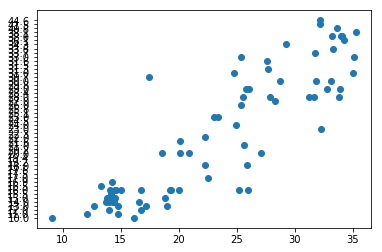

In [20]:
plt.scatter(y_pred, y_test)
plt.show()

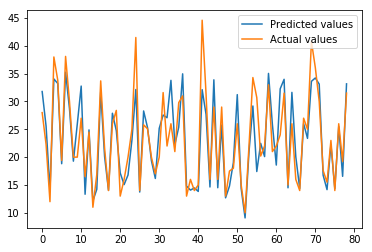

In [21]:
plt.plot(y_pred, label="Predicted values")
plt.plot(y_test.values, label="Actual values")
plt.legend()
plt.show()